**Name-Juhi Vishakha**



**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

**Reading dataset**

In [3]:
dataset=pd.read_csv('/content/SampleSuperstore.csv')
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Information about Datasets** 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Description of Dataset**

In [5]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Checking number of Missing Values**

In [6]:
dataset.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Visualization of Missing Values**

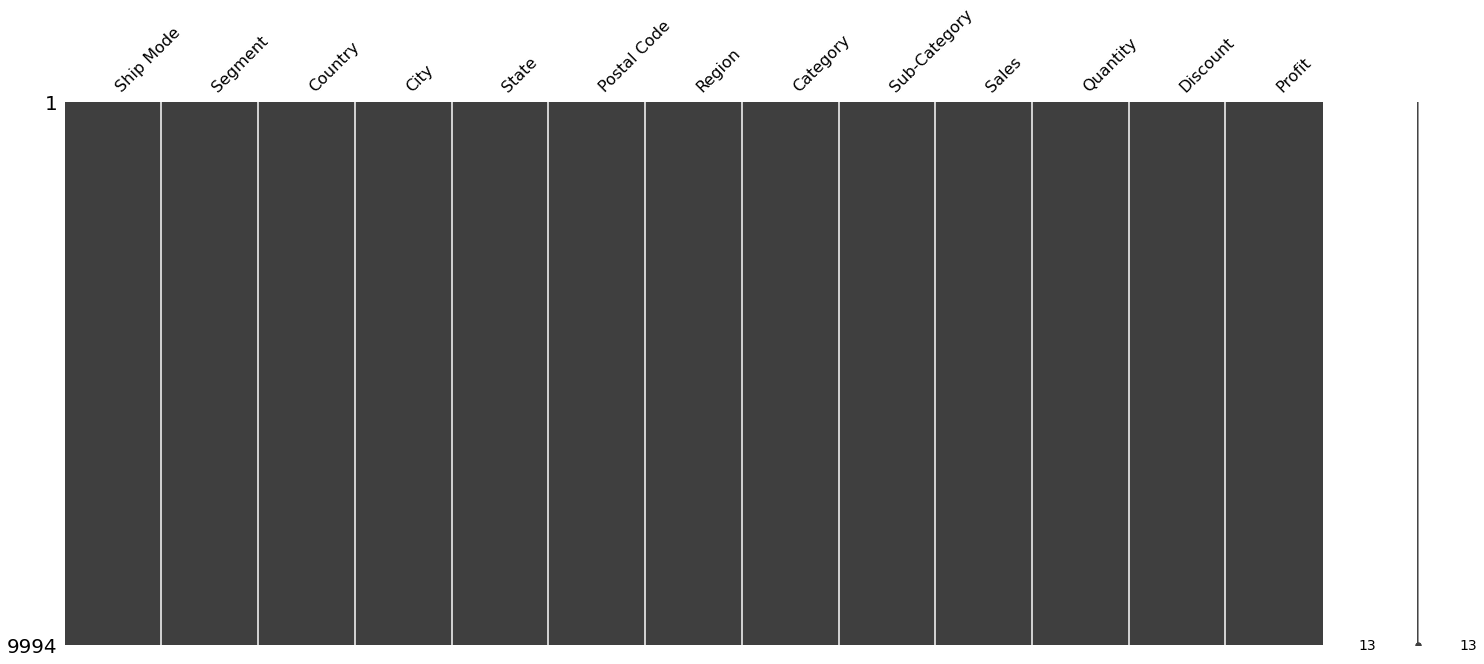

In [7]:
msno.matrix(dataset)

As there are no missing values in the given datasets so there are no occurance of white lines in this graph.

**Checking for Duplicates**

In [8]:
dataset.duplicated().sum()

17

In [9]:
dataset.drop_duplicates(subset=None,keep='first', inplace=True)

In [10]:
dataset.duplicated().sum()

0

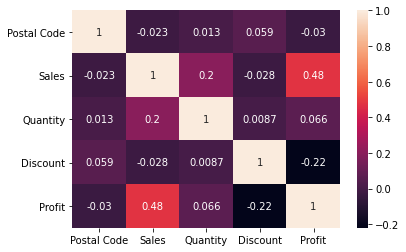

<Figure size 720x360 with 0 Axes>

In [11]:
sns.heatmap(dataset.corr(),annot=True)
plt.figure(figsize=(10,5))
plt.show()

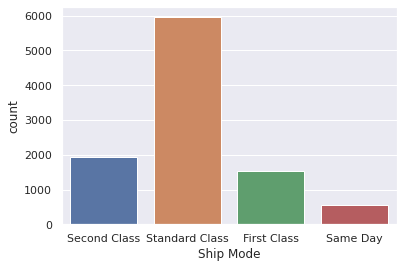

In [12]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Ship Mode',data=dataset)

**Most of the items are delivered by Ship Mode of Standerd Class**

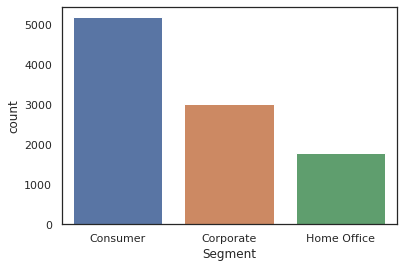

In [13]:
sns.set_theme(style='white')
sns.countplot(x='Segment',data=dataset)

**Maximum Buyers are from Consumer Segment**

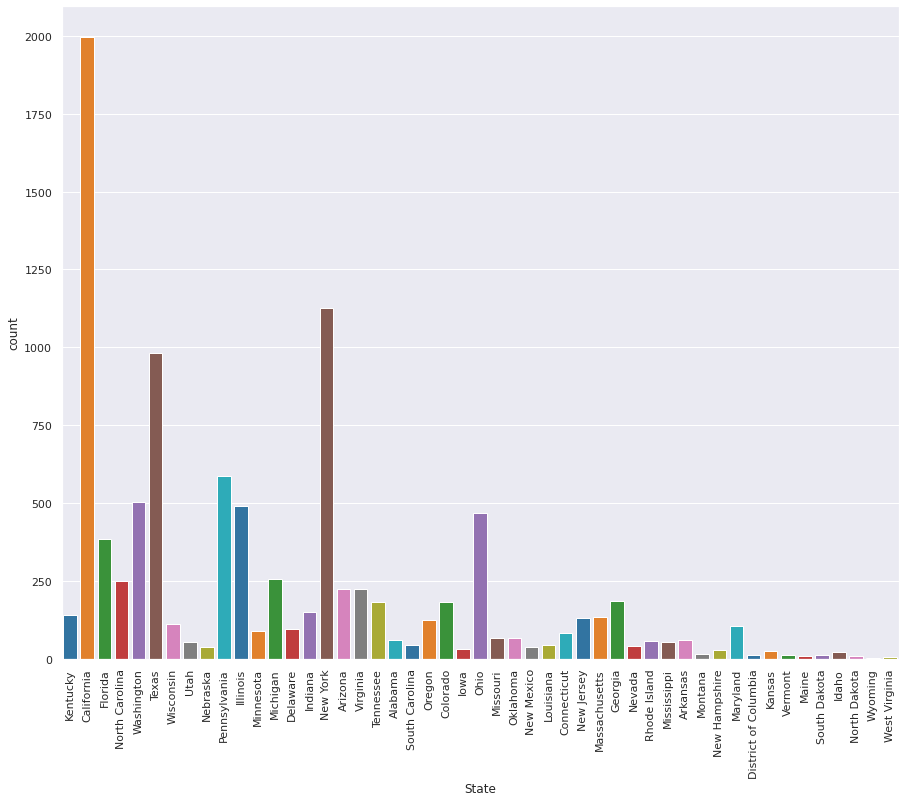

In [14]:
plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
sns.countplot(x='State',data=dataset,palette='tab10')
plt.xticks(rotation=90)
plt.show()

**California has maximum number of buyers.**

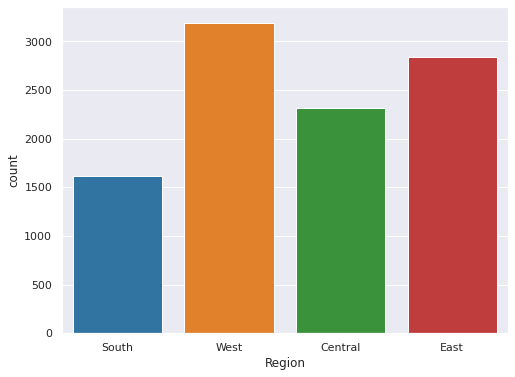

In [15]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Region',data=dataset,palette='tab10')
plt.show()

**West Region has the maximum buyers and the least are from South**

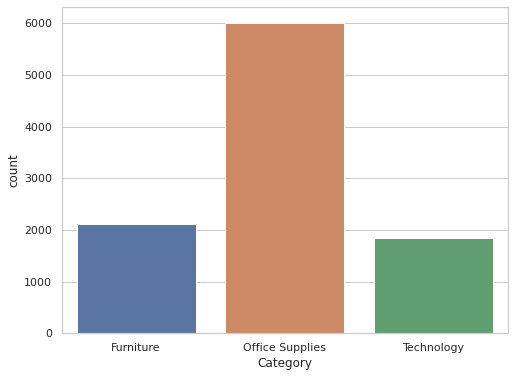

In [16]:
plt.figure(figsize=(8,6))
sns.set_theme(style='whitegrid')
sns.countplot(x='Category',data=dataset,palette='deep')
plt.show()



**Most of the items are from Office Supplies Category**

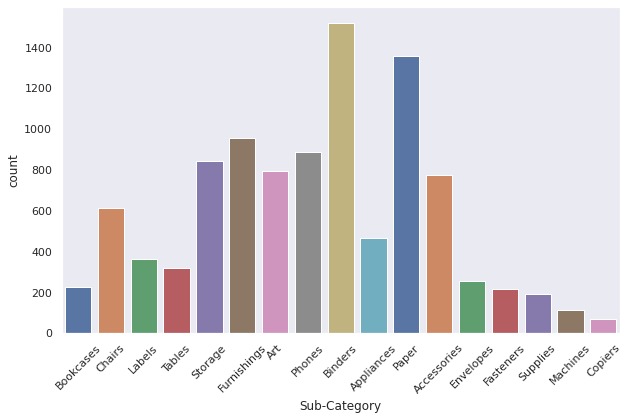

In [17]:
plt.figure(figsize=(10,6))
sns.set_theme(style='dark')
sns.countplot(x='Sub-Category',data=dataset,palette='deep')
plt.xticks(rotation=45)
plt.show()

**Items are mostly from Blinders and are least for copiers**

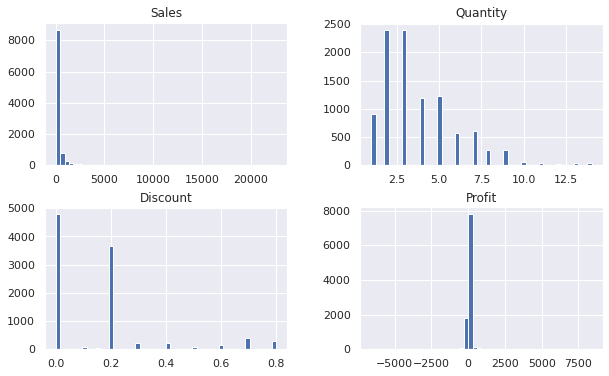

In [18]:
dataset['Postal Code']=dataset['Postal Code'].astype('object')
dataset.hist(figsize=(10,6),bins=50)
plt.show()

**Quantity around 2-3 are sold maximum and discount is mostly given of (0-20)%**

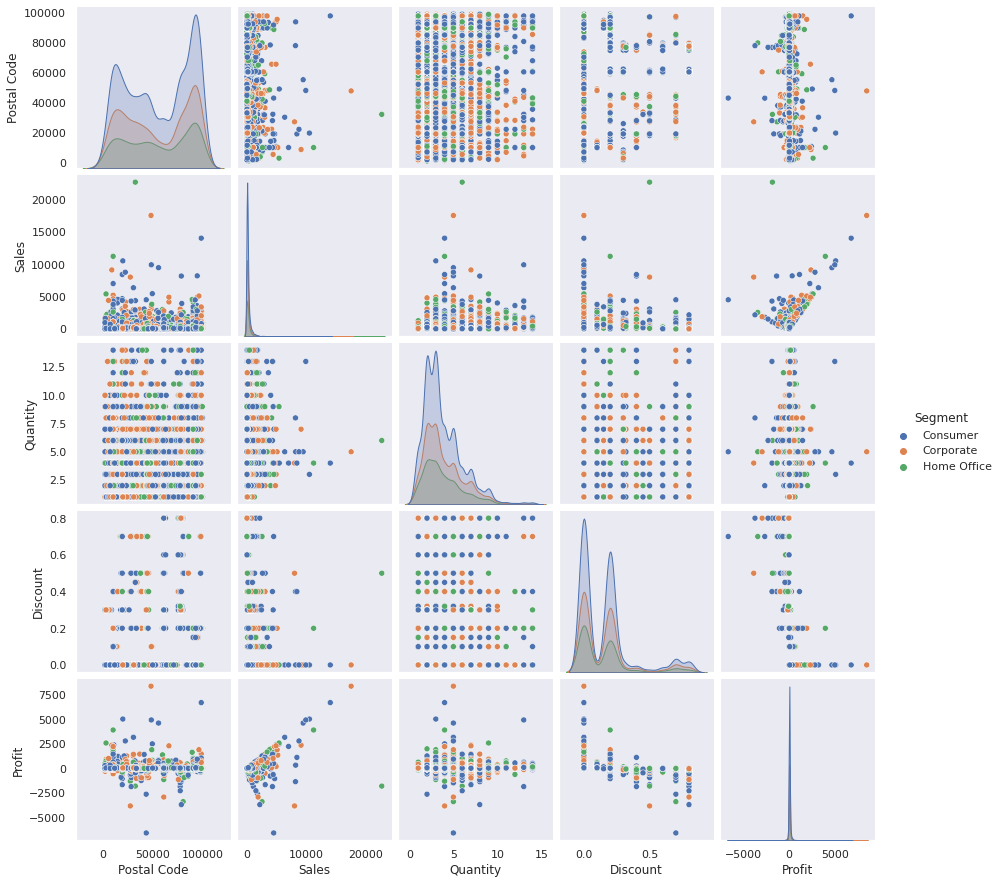

In [19]:
dataset['Postal Code']=dataset['Postal Code'].astype('int64')
sns.pairplot(dataset,hue='Segment')

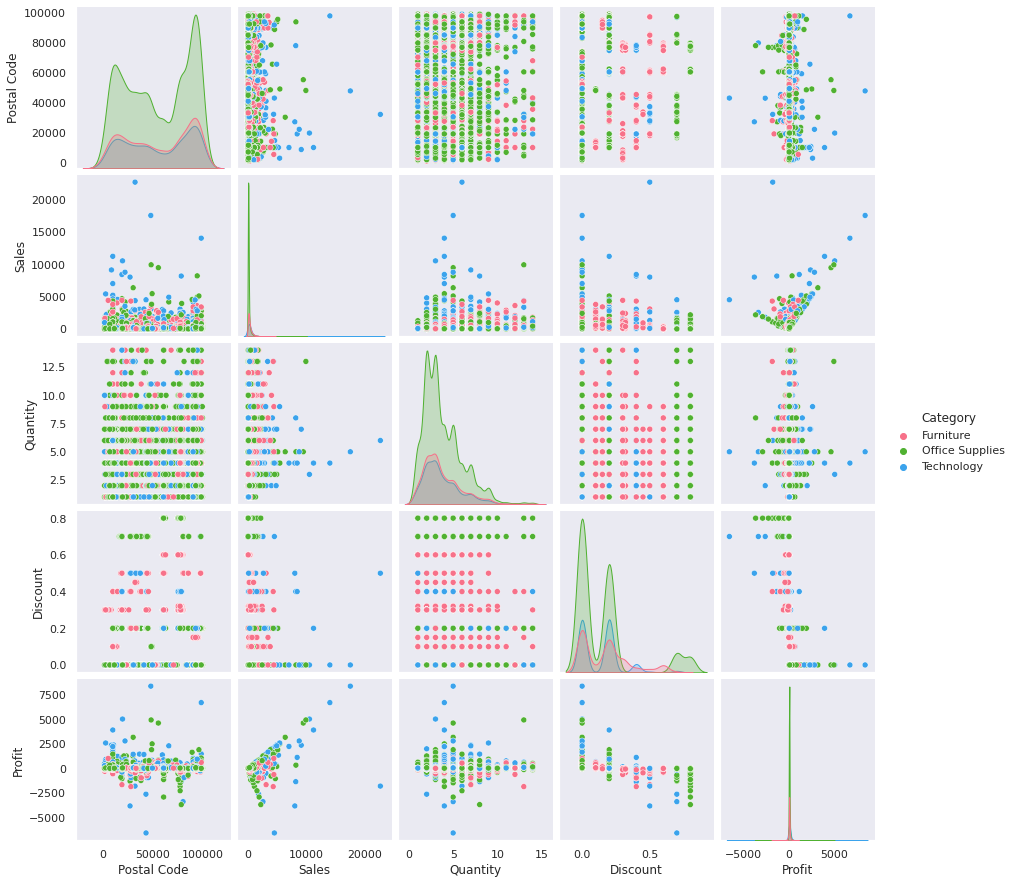

In [20]:
sns.pairplot(dataset,hue='Category',palette='husl')

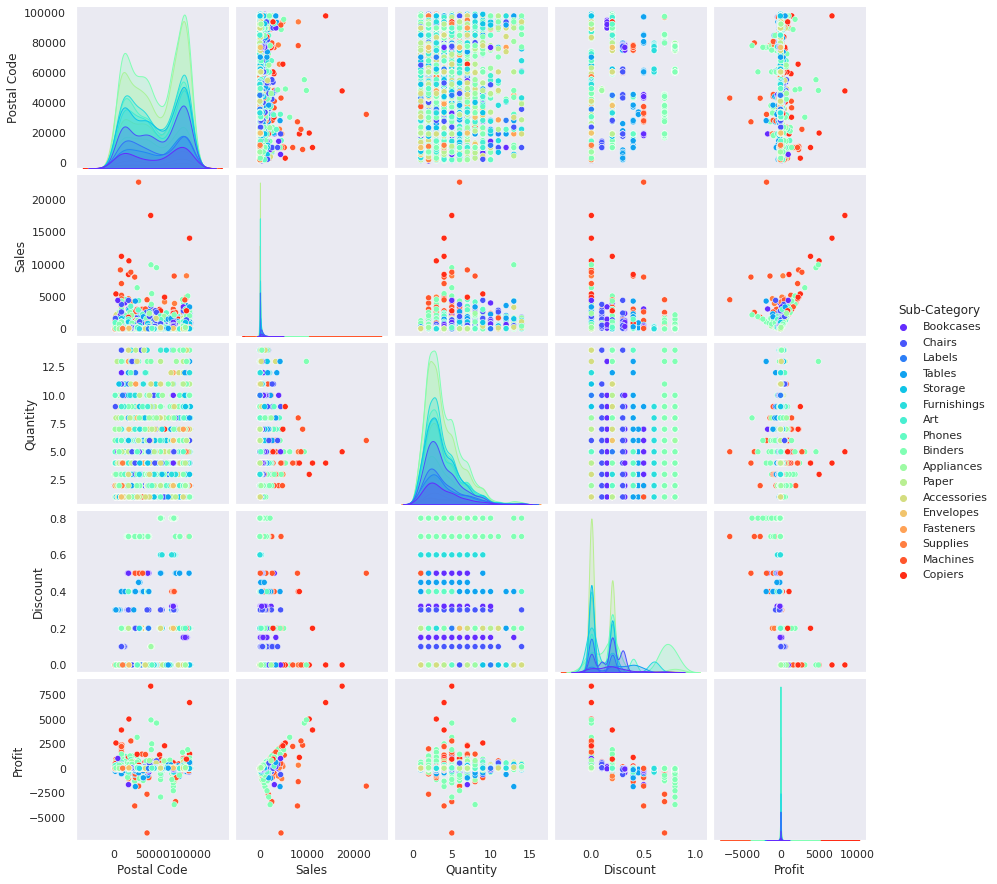

In [21]:
sns.pairplot(dataset,hue='Sub-Category',palette='rainbow')

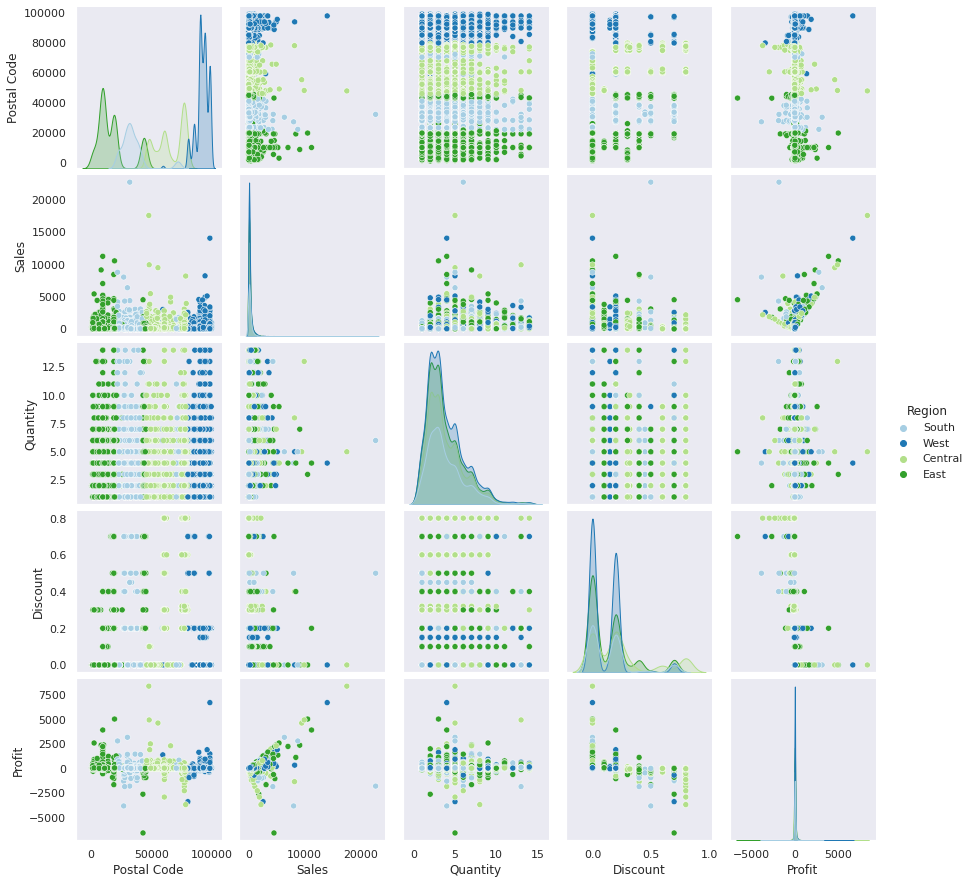

In [22]:
sns.pairplot(dataset,hue='Region',palette="Paired")

<Figure size 720x432 with 0 Axes>

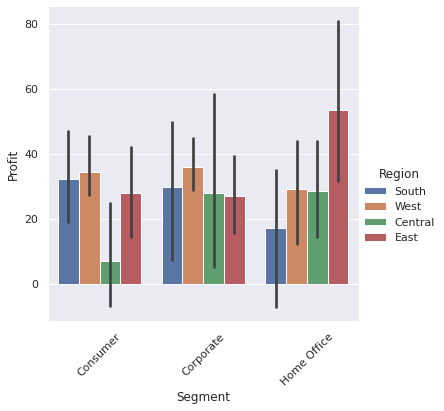

In [58]:
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.catplot(x='Segment',y='Profit',hue='Region',kind="bar",data=dataset)
plt.xticks(rotation=45)
plt.show()

**Consumer Section of Central Region has very low profit.Efforts should be applied to increase profits in these areas**

<Figure size 720x432 with 0 Axes>

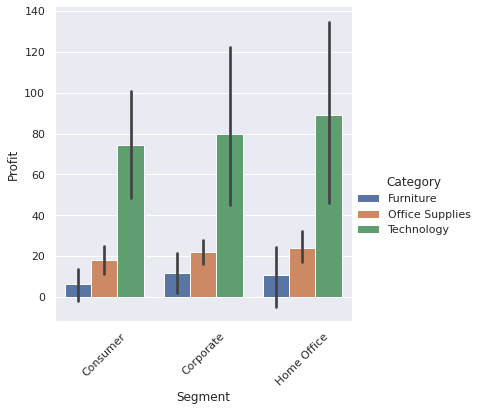

In [62]:
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.catplot(x='Segment',y='Profit',hue='Category',kind="bar",data=dataset)
plt.xticks(rotation=45)
plt.show()

**Profits are actually less from furniture category of Consumer Section.**

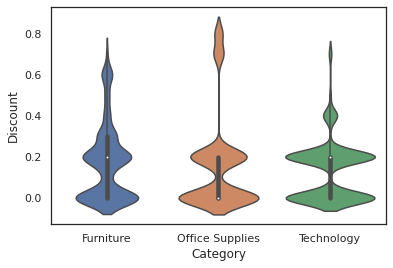

In [48]:
sns.set_theme(style='white')
sns.violinplot(x="Category",y="Discount",data=dataset)

**From above graph most of the items are from Office Supplies Category so discount should be given to more on this items than furniture so that profit can be increased.**

**Visualization of Profit and Sales in different Segments**

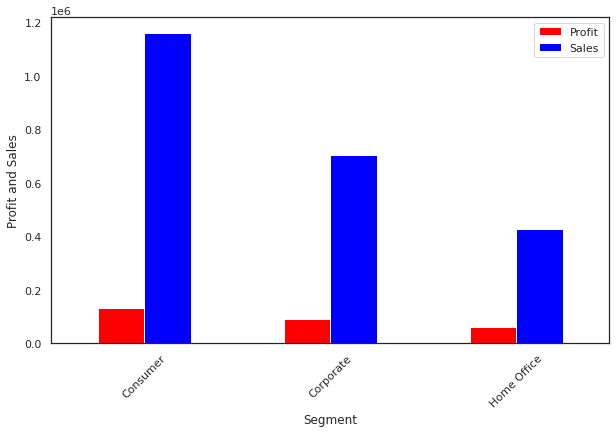

In [50]:
dataset.groupby("Segment")[['Profit','Sales']].sum().plot.bar(color=["red","blue"],figsize=(10,6))
plt.ylabel("Profit and Sales")
plt.xticks(rotation=45)
plt.show()

Maximum Profit and Sales are from Consumer Segemnt.

**Visualization of Profit and Sales in different Regions**

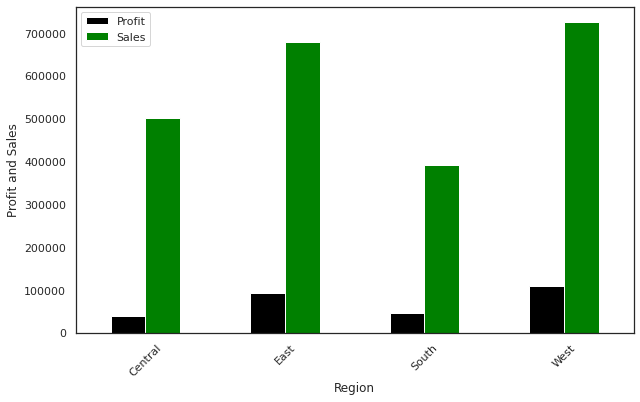

In [39]:
dataset.groupby("Region")[['Profit','Sales']].sum().plot.bar(color=["black","green"],figsize=(10,6))
plt.ylabel("Profit and Sales")
plt.xticks(rotation=45)
plt.show()

Maximum Profit and Sales are from West and East region.

**Visualization of Profit and Sales in different Categories**



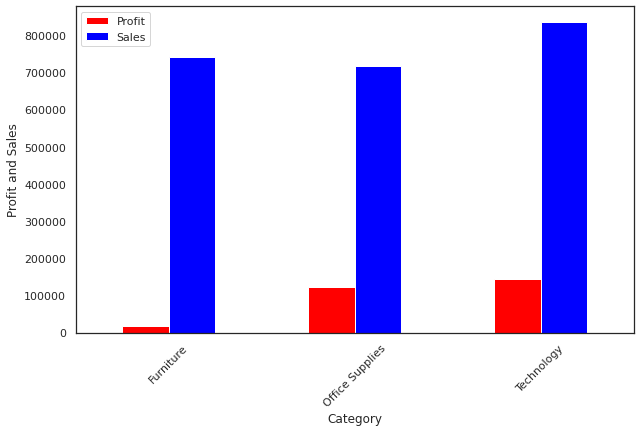

In [40]:
dataset.groupby("Category")[['Profit','Sales']].sum().plot.bar(color=["red","blue"],figsize=(10,6))
plt.ylabel("Profit and Sales")
plt.xticks(rotation=45)
plt.show()

Maximum Profit and Sales are from Technology Category.

**Visualization of Profit and Sales in different Sub-Categories**

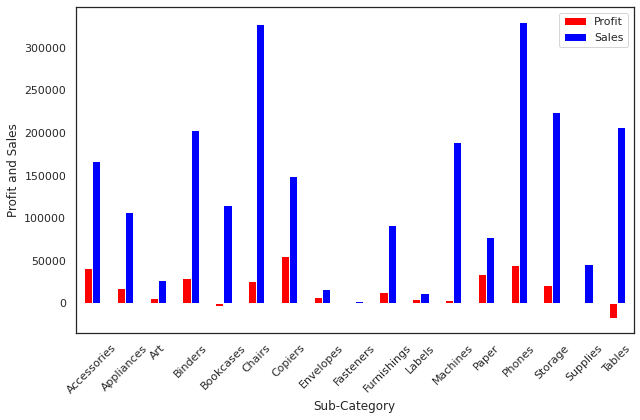

In [41]:
dataset.groupby("Sub-Category")[['Profit','Sales']].sum().plot.bar(color=["red","blue"],figsize=(10,6))
plt.ylabel("Profit and Sales")
plt.xticks(rotation=45)
plt.show()

Maximum Profit and Sales are from Chairs and Phone Section.



**Visualization of Profit vs Sales**

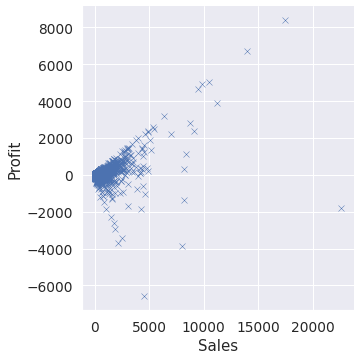

In [53]:
sns.set_theme(style="darkgrid", font_scale=1.25)
sns.relplot(
    data=dataset,
    x="Sales", y="Profit",
    palette="crest", marker="x")

**Visualization of Profit and Quantity**

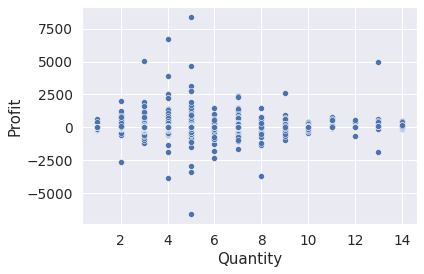

In [56]:
sns.set_theme(style="darkgrid", font_scale=1.25)
sns.scatterplot(
    data=dataset,
    x="Quantity", y="Profit")

**Visualization of Profit and Discount**

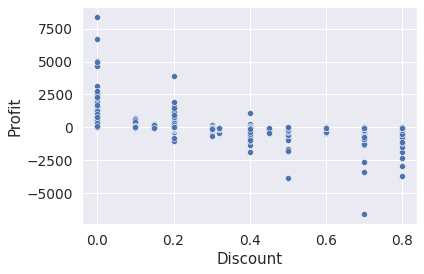

In [57]:
sns.set_theme(style="darkgrid", font_scale=1.25)
sns.scatterplot(
    data=dataset,
    x="Discount", y="Profit")

**CONCLUSION**
1.Most of the items are delivered by Ship Mode of Standerd Class
2.Maximum Buyers are from Consumer Segment
3.California has maximum number of buyers.
4.West Region has the maximum buyers and the least are from South'
5.Most of the items are from Office Supplies Category
6.Items are mostly from Blinders and are least for copiers.

**THANKYOU**